In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd .read_csv("Datasets/train.csv")

In [3]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


NOTE:
     MAE : mean absulate Error  ; Equation: |( yi - y^)|
 
     MSE : mean square Error    ; Equation: |( yi - y^)|**2
 
     RMSE: Root mean square error 

In [4]:
df.drop(["name","cabin","ticket","embarked"],axis = 1, inplace = True)

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [6]:
df = df.fillna(method="ffill")

In [7]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [8]:
o = OrdinalEncoder()

In [9]:
df["sex"] = o.fit_transform(df[["sex"]])

In [10]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(["age"],axis = 1),df["age"],test_size = 0.3 , random_state = 21)

In [11]:
x_train

,survived,pclass,sex,sibsp,parch,fare
241,1,3,0.0,1,0,15.5000
734,0,2,1.0,0,0,13.0000
581,1,1,0.0,1,1,110.8833
456,0,1,1.0,0,0,26.5500
118,0,1,1.0,0,1,247.5208
...,...,...,...,...,...,...
368,1,3,0.0,0,0,7.7500
48,0,3,1.0,2,0,21.6792
772,0,2,0.0,0,0,10.5000
824,0,3,1.0,4,1,39.6875


In [12]:
l = LinearRegression()

In [13]:
l.fit(x_train , y_train)

LinearRegression()

In [14]:
y_prd = l.predict(x_test)

In [15]:
y_prd

array([27.24714063, 29.58043657, 29.5768424 , 29.38312839, 29.6100851 ,
       21.419627  , 36.6537477 , 35.37067623, 29.58053782, 38.17806642,
        4.95159377, 21.96080111, 29.58306892, 35.4212984 , 32.66999469,
       29.58337266, 35.42332328, 17.09396546, 30.87664091, 20.7273535 ,
       15.99032048, 33.8516917 , 41.23249563, 29.58053782, 25.02320779,
       23.80307475, 20.33480867, 36.46749689, 23.88277619, 28.09293902,
       24.6021967 , 28.14211015, 13.20611236, 29.58053782, 26.81013254,
       34.41105461, 25.00459584, 26.91884274, 29.57073413, 41.18410085,
       33.74656648, 32.64974582, 22.67132706,  4.95159377, 29.58094279,
       29.58306892, 29.58266395, 24.60091414, 33.8516917 , 20.71285725,
       35.43344771, 29.57994736, 24.60116725, 23.77509545, 29.58053782,
       35.17831202, 29.57687601, 36.25434   , 12.78476353, 29.55337072,
       32.99778033, 32.66999469, 30.8341183 , 29.57932288, 29.58266395,
       41.12942891, 33.90190888, 33.07109465, 27.24621669, 30.00

In [16]:
r2_score(y_prd,y_test)

-3.416845203655712

In [17]:
mean_absolute_error(y_prd,y_test)

10.711309480590515

In [18]:
mean_squared_error(y_prd,y_test)

180.3998304182622

In [19]:
np.sqrt(mean_squared_error(y_prd,y_test))

13.431300399375417

<Axes: xlabel='age', ylabel='Count'>

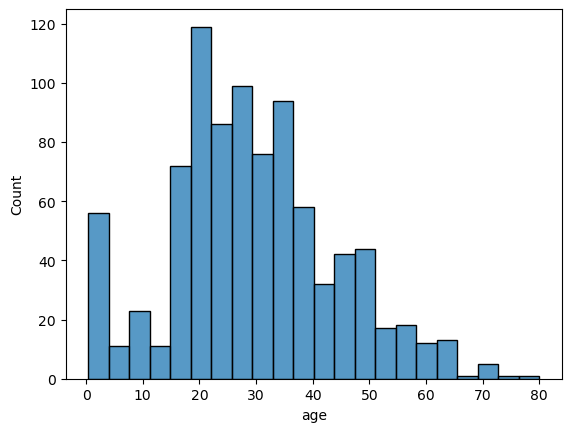

In [20]:
sns.histplot(df["age"])

NOTE:this dataset is not suaitable for lLinearRegression